1. 볼린저 밴드 지표 1: %b
1. [볼린저 밴드 지표 2: 밴드폭](#6.3.3-볼린저-밴드-지표-2:-밴드폭)
1. [추세 추종 매매기법](#6.4.1-추세-추종-매매기법)

# 6.3 볼린져 밴드 지표

보통 많이 사용하는 보조지표로는 "이동평균선", "일목균형표", "볼린져 밴드", "매물대", "상대강도지수 RSI", "이동평균 수렴확산 MACD" 등을 사용한다.

볼린져 밴드는 주가의 변동이 표준 정규분포를 따른다는 가정에서 주가의 위.아래 밴드를 표시해서 주가의 상대적인 높낮이를 표현해 준다. 기술적 분석에서 투자자들이 선호하는 지표이다.

존 볼리저가 저술한 "[볼린저 밴드 투자 기법, 2021, 이레미디어](http://www.yes24.com/Product/Goods/96806831#:~:text=%EA%B8%B0%EB%B2%95%20I%EC%9D%80%20%EB%B0%B4%EB%93%9C%ED%8F%AD,%ED%95%98%EB%8A%94%20%EC%B6%94%EC%84%B8%EC%B6%94%EC%A2%85%EA%B8%B0%EB%B2%95%EC%9D%B4%EB%8B%A4.)" 에서 어떤 통계학적 기법을 이용해 볼리저 밴드를 개발했는지, 볼린저 밴드를 다른 지표들과 어떻게 연계해야 최적의 결과를 얻는지에 대해 상세하게 기술되어 있다.

## 6.3.1 볼린저 밴드 구하기

볼리저 밴드는 주가의 *20일 이동 평균선*을 기준으로 상대적인 고점을 나타내는 상단 밴드와 상대적 저점을 나타내는 하단 밴드로 구성된다. 주가가 상단 밴드에 위치하면 주가가 상대적 고점에, 하단 밴드에 위치하면 상대적 저점이라 판단.

상단 밴드와 하단 밴드 사이의 폭은 주가의 표준편차와 특정 상수의 곱으로 나타낼 수 있다. 밴드폭이 좁을 수록 변동성이 작고, 밴드폭이 넓을 수록 변동성이 크다.

공식:

- 상단 볼리저 밴드 = 중간 볼리저 밴드 + (2 x 표준편차)
- 준단 볼리저 밴드 = 종가의 20일 이동평균
- 하단 볼리저 밴드 = 중간 볼리저 밴드 - (2 x 표준편차)

> 통계학에 따르면 평균값에서 +-2x표준편차 이내에 표본값 95.4% 이 존재한다고 한다. 그래서 볼린져 밴드 내부에 존재할 확률도 95.4% 이다.

네이버 종가 데이터로 볼리저 밴드를 그려보자, 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

import sys
sys.path.append('../Libraries') 
import load_hangul_fonts

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것

In [ ]:
import numpy as np
import pandas as pd

import FinanceDataReader as fdr


def krx_stocks(exchange='KRX'):
    '''
    v0.1
     - FDR 를 사용해서 KRX에 속한 주식종목 정보를 반환한다.
     - 매월 csv 파일에 저장하고 파일이 없는 경우 FDR로 다룬다.
    '''
    import time
    from pathlib import Path

    ym = time.strftime('%Y%m', time.localtime(time.time()))
    data_root = 'data'
    krx_stock_csv = Path(f'{data_root}/krx-stocks-{ym}.csv')
    if not krx_stock_csv.exists():
        df_krx = fdr.StockListing('KRX')
        df_krx.to_csv( krx_stock_csv, index=False)
        print(f'KRX {ym} Stock Listing from KRX')
    else:
        df_krx = pd.read_csv( krx_stock_csv)
        print(f'KRX {ym} Stock Listing from file: {krx_stock_csv}')
    return df_krx


def krx_symbols(names=[]):
    '''
    v0.1 
     - 주어진 names 종목이름 리스트에 대한 종목코드와 이름을 반환한다
    '''
    df_krx = krx_stocks()

    # 종목명으로 이름과 코드 찾기
    df_stocks = df_krx[df_krx['Name'].isin( names )][['Name', 'Symbol']]
    return df_stocks

In [ ]:
symbols = krx_symbols(['NAVER'])
symbols

In [ ]:
dfstock = fdr.DataReader(symbols.Symbol.iloc[0], '2021-01-02')
dfstock.head()

In [ ]:
dfstock.shape

In [ ]:
df = dfstock.copy()

In [ ]:
df['MA20'] = df['Close'].rolling(window=20).mean()  # 종가 20 이동평균
df['stddev'] = df['Close'].rolling(window=20).std() # 종가 20 이동평균에 대한 표준편차
df['upper'] = df['MA20'] + (df['stddev'] * 2)   # 볼리전 밴드 상단
df['lower'] = df['MA20'] - (df['stddev'] * 2)   # 볼린저 밴드 하단

In [ ]:
# 20일 이동평균을 구하므로 19번째 까지 MA20, stddev등이 NaN이다.
df.head()

In [ ]:
df[18:]

In [ ]:
df = df[19:] # 20번째 행부터

### 이동평균

단기, 장기로 5일, 20일 이동평균을 구해보자.

In [ ]:
df['MA5'] = df['Close'].rolling(window=5).mean()  # 종가 20 이동평균
df['diff'] = df['MA5'] - df['MA20']

ax = df[['Close','MA20','MA5']].plot(figsize=(15,5),\
                                     style=['k-','r--','m--'])
plt.show()

In [ ]:
def bollingerband(df, **kwargs):
    if 'name' in kwargs.keys() and kwargs['name'] == True:
        print(kwargs['name'])

In [ ]:
bollingerband({})

### 골든크로스, 데스크로스 

단기/장기 이동평균의 차이값 예를 들어 `MA_5 - MA_20` 차이값을 비교해서 부호가 바뀌어 음이면 데드크로스 양이면 골드크로스로 판다.
 - 크로스 : 차이값 x 이전 차이값 < 0 (즉, 이전 값과 부호가 바뀌는 경우)


In [ ]:
prev_key = prev_val = 0
ax = df[['Close','MA20','MA5']].plot(figsize=(15,5),\
                                          style=['k-','r--','m--'])
#http://matplotlib.org/users/annotations_guide.html
for key, val in df['diff'][1:].iteritems():
    if val == 0:
        continue
    if val * prev_val < 0 and val > prev_val:
        #print('[golden]', key, val)
        ax.annotate('Golden', xy=(key, df['MA20'][key]),\
            xytext=(10,-30), textcoords='offset points', fontsize=16,\
            arrowprops=dict(arrowstyle='-|>'))
    if val * prev_val < 0 and val < prev_val:
        #print('[dead]', key, val)
        ax.annotate('Dead', xy=(key, df['MA20'][key]),\
            xytext=(10,30), textcoords='offset points', fontsize=16,\
            arrowprops=dict(arrowstyle='-|>'))

    prev_key, prev_val = key, val
plt.show()

볼린져 밴드 

In [ ]:
# 볼리저 밴드
# 밴드 대역폭을 날짜별로 
plt.figure(figsize=(9, 5))
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')    # ⑥
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')       # ⑦
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')  # 상단/하단 밴드 사이를 회색
plt.legend(loc='best')
plt.title('NAVER Bollinger Band (20 day, 2 std)')
plt.show()

In [ ]:
# Dataframe 의 plot 사용
ax = df[['Close','upper','MA20','lower']].plot(figsize=(9,5),\
                                          style=['#0000ff','r--','k--','c--'])
# ax[0].set_label('Close')
# ax.set_label(['Upper band','Moving Average 20', 'Lower band'])
plt.fill_between(df.index, df['upper'], df['lower'], color='.9')
plt.show()

통계학에 따르면 평균값에서 +-2x표준편차 이내에 표본값 95.4% 이 존재한다고 한다. 그래서 볼린져 밴드 내부에 존재할 확률도 95.4% 이다.

## 6.3.2 볼린저 밴드 지표 1: `%b`

***볼린저 밴드 승수 (PB, Percent Bandwidth)***  는 볼리저 밴드에 주가가 어느 위치인지를 나타내는 지표이다. PB는 종가와 하단 밴드의 차이를 상단과 하단 밴드 차이의 비율로  `%b` 로 표시하기도 한다.

$$
\text{%b} = \frac{\text{종가}-\text{하단 볼린저 밴드}}{\text{상단 볼린저 밴드}-\text{중간 볼린저 밴드}}
$$

%b는 종가가 상단에 걸쳐 있을 때 1.0이 되고, 중간에 걸치면 0.5, 하단에 걸치면 0.0이 된다. %b는 상한선, 하한선이 없어서 종가가 상단 밴드보다 위에 있으면 1.0을 넘고, 종가가 하단 밴드 아래 있으면 0보다 작은 수가 된다. 

예를 들어 %b가 1.1.이면 주가가 상단밴드보다 10% 위에 있다는 의미가 된다.

볼린져 밴드 그래프에 %b 지표를 추가해 보자.

In [ ]:
df = dfstock.copy()

In [ ]:
df['MA20'] = df['Close'].rolling(window=20).mean()  # 종가 20 이동평균
df['stddev'] = df['Close'].rolling(window=20).std() # 종가 20 이동평균에 대한 표준편차
df['upper'] = df['MA20'] + (df['stddev'] * 2)   # 볼리전 밴드 상단
df['lower'] = df['MA20'] - (df['stddev'] * 2)   # 볼린저 밴드 하단
df['PB'] = (df['Close'] - df['lower']) / (df['upper'] - df['lower'])   # %b

In [ ]:
df = df[19:]

In [ ]:
# 볼리저 밴드
# 밴드 대역폭을 날짜별로 

plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)  # ②
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)  # ③
plt.plot(df.index, df['PB'], color='b', label='%B')  # ④
plt.grid(True)
plt.legend(loc='best')
plt.show()


%b는 밴드 하단 0, 중간 0.5, 상단 1.0 을 나타내므로 0~1사이 범위에서 실제 주가와 유사한 흐름을 볼 수 있다.

## 6.3.3 볼린저 밴드 지표 2: 밴드폭

***밴드폭(Bandwidth)*** 은 상단 볼리저 밴드와 하단 볼린저 밴드 사이의 폭으로 밴드폭으로 쉬키즈squeeze를 확인하는데 유용하다. 

밴드폭 산출 공식
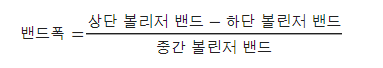

밴드폭의 중요한 역할은 강력한 추세의 시작과 마지막을 포착하는 것이다.

In [ ]:
df = dfstock.copy()

In [ ]:
symbol = symbols.Symbol.iloc[0] #'005930' #
df = fdr.DataReader(symbol, '2021-01-02')
df['MA20'] = df['Close'].rolling(window=20).mean()
df['stddev'] = df['Close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100 # ①
df = df[19:]

In [ ]:
plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title(f'{symbol} Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')
plt.subplot(2, 1, 2)
plt.plot(df.index, df['bandwidth'], color='m', label='BandWidth') # ②
plt.grid(True)
plt.legend(loc='best')
plt.show()

밴드폭은 상단 볼리전 밴드와 하단 볼리전 밴드폭 차이를 20일 이동평균의 비율로 나타낸 것으로 상단과 하단이 벌어질 때 밴드폭 수치가 커지는 것을 알 수 있다.

# 6.4 볼리저 밴드 매매 기법

"상단 밴드에 매도하고, 하단 밴드에 매수하라" 라는 것은 잘못된 통념이다. 밴드 태그(주가가 밴드에 닿는 현상)이 일어났다고 그 자체로 매수/매도 신호가 되는 것은 아니다.

1. **%b 지표** 는 볼리저 밴드 어디에 주가가 위치하는 지를 나타내며 주가와 연계해 트레이딩 시스템을 구축할 때 필요한 핵심 수단이다. 
2. **밴드폭** 은 밴드 너비를 수치로 나타낸 것으로 추세의 시작과 끝을 포착하는 역할을 한다.
3. 변동성과 추세는 볼리저 밴드에 반영되었으니 이것이 주가 움직임을 확증하는 증거는 아니다.

## 6.4.1 추세 추종 매매기법

***추세추종 Trend Following*** 은 상승 추세에 매수하고 하락 추세에 매도하는 기법이다. 상승/하락 추세의 시작을 %b 지표로 상/하단을 태그했는지 여부로 판단하지 않고 *"현금흐름지표 MFI"* 나 *"일중강도 II"' 같은 거래량 관련 지표를 함께 사용해서 확증이 이루어진 경우에만 매수/매도에 들어간다.

- 매수: 주가가 상단 밴드에 접근하며 지표가 강세를 확증할 때만 매수
     - %b가 0.8보다 크고, MFI가 80보다 클때
- 매도: 주가가 하단 밴드에 접근하며, 지표가 약세를 확증할 때만 매도
     - %b가 0.2보다 작고, MFI가 20보다 작을 때

### - 현금흐름 지표 MFI Money Flow Index

보통 주가를 종가로 나타내는데 ***중심가격 (TP, Typical Price)*** 을 사용하면 트레이딩 집중적으로 발생하는 주가 지점을 더 잘 나타낼 수 있다. 중심가격은 일정 기간의 고가, 저가, 종가를 합한뒤 3으로 나눈것이다. 
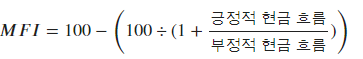

 - 긍정적 현금 흐름: 중심 가격이 전일 보다 상승한 날들의 현금 흐름의  합
 - 부정적 현금 흐름: 중심 가격이 전일 보다 하락한 날들의 현금 흐름의 합

### 추세 추종 매매 구현

네이버의 2019년 주가를 가지고 살펴보자.

In [ ]:
dfstock = fdr.DataReader(symbols.Symbol.iloc[0], '2019-01-02', '2019-12-31')
df = dfstock.copy()

In [ ]:
df['MA20'] = df['Close'].rolling(window=20).mean() 
df['stddev'] = df['Close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['Close'] - df['lower']) / (df['upper'] - df['lower']) # 밴드 승수
df['TP'] = (df['High'] + df['Low'] + df['Close']) / 3    # 중심가격

아래는 10일 기준 현금흐름지표를 구하고 있다.

In [ ]:
df['PMF'] = 0   # 긍정적 현금 흐름
df['NMF'] = 0   # 부정적 현금 흐름
for i in range(len(df.Close)-1):
    if df.TP.values[i] < df.TP.values[i+1]:  # 긍정적
        df.PMF.values[i+1] = df.TP.values[i+1] * df.Volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:                                    # 부정적
        df.NMF.values[i+1] = df.TP.values[i+1] * df.Volume.values[i+1]
        df.PMF.values[i+1] = 0
# 현금흐름 비율
df['MFR'] = (df.PMF.rolling(window=10).sum() / df.NMF.rolling(window=10).sum())
# 현금흐름 지표
df['MFI10'] = 100 - 100 / (1 + df['MFR'])

MFI는 0에서 100사이 움직이는 한계 지표로 80을 상회하면 강한 매수 신호, 20을 하회하면 강한 매도 신호가 된다.

In [ ]:
df = df[19:]

plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
plt.title('NAVER Bollinger Band(20 day, 2 std) - Trend Following')
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(len(df.Close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:       # #MFI 80보다 크다
        plt.plot(df.index.values[i], df.Close.values[i], 'r^')  # ②
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:     # #MFI 20보다 작다
        plt.plot(df.index.values[i], df.Close.values[i], 'bv')  # ④
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.plot(df.index, df['PB'] * 100, 'b', label='%B x 100')       # ⑤ 
plt.plot(df.index, df['MFI10'], 'g--', label='MFI(10 day)')     # ⑥
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])                  # ⑦
for i in range(len(df.Close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:       #MFI 80보다 크다
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:     #MFI 20보다 작다
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show();   


2019년 7월말 경에 매수신호가 연달다 4개 나왔다, 만약 이 매수신호를 따럈다면.... 2019년말 큰 수익을 얻을 수 있다.

## 6.4.2 볼린저 밴드를 이용한 반전 매매기법

- 매수: 주가가 하단 밴드 부근에서 W형 패턴을 보이고, 강세 지표가 확증 할 때 매수 (%b가 0.05보다 작고 II%가 0보다 크면 매수
- 매도: 주가가 상단 밴드 부근에서 일련의 주가 태그가 일어나며, 약세 지표가 확증 할 때 매도 (%b가 0.95보다 크고 II%가 0보다 작으면 매도


### - 일중 강도(Intraday Intensity, II)

일중강도(II%)는 데이빗 보스티언이 개발한 거래량 지표이다. 거래 범위에서 종가의 위치를 토대로 주식 종목의 자금 흐름을 설명한다. **`II%`** 는 장이 끝나는 시점에서 트레이더의 움직임을 나타내는데 종가가 거래 범위 천정에 형성되면 1, 중간에 형성되면 0, 바닥권이면 -1 이 된다.

21일 기간동안 II% 합을 21동안 거래량 합으로 나누어 표준화 한 것이 ***일중강도 II%*** 이다.
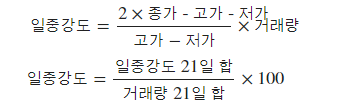

다음은 SK하이닉스의 일별 시세를 이용해 일중 강도를 계산했다.

In [ ]:
symbols = krx_symbols(['SK하이닉스'])
dfstock = fdr.DataReader(symbols.Symbol.iloc[0], '2018-11-01', '2019-12-31')
dfstock.head()

In [ ]:
df = dfstock.copy()

볼린저 밴드와 일중강도율

In [ ]:
df['MA20'] = df['Close'].rolling(window=20).mean() 
df['stddev'] = df['Close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['Close'] - df['lower']) / (df['upper'] - df['lower'])

df['II'] = (2*df['Close']-df['High']-df['Low']) \
            /(df['High']-df['Low'])*df['Volume']  # 고가/저가/종가 이용 일중강도
df['IIP21'] = df['II'].rolling(window=21).sum() \
            / df['Volume'].rolling(window=21).sum()*100  # 21 일중강도합을 21일 거래량과 계산
df = df.dropna()

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.title('SK Hynix Bollinger Band(20 day, 2 std) - Reversals')
plt.plot(df.index, df['Close'], 'b', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')

plt.legend(loc='best')
plt.subplot(3, 1, 2)
plt.plot(df.index, df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3)  # ③
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')  # 21일 일중강도
plt.grid(True)
plt.legend(loc='best')
plt.show()

### 반전 매매 구현

일별 시세를 이용해 볼리저 밴드의 반전 매매를 구현해 보자. **반전 매매기법** 은 볼린저 밴드 %b와 거래량 지표인 일중강도율 II%을 사용한다.  앞의 코드에서 매수/매도 신호를 표시하는 코드를 추가하자.

In [ ]:
df = dfstock.copy()

In [ ]:
df['MA20'] = df['Close'].rolling(window=20).mean() 
df['stddev'] = df['Close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['Close'] - df['lower']) / (df['upper'] - df['lower'])

df['II'] = (2*df['Close']-df['High']-df['Low']) \
            /(df['High']-df['Low'])*df['Volume']  # 고가/저가/종가 이용 일중강도
df['IIP21'] = df['II'].rolling(window=21).sum() \
            / df['Volume'].rolling(window=21).sum()*100  # 21 일중강도합을 21일 거래량과 계산
df = df.dropna()

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.title('SK Hynix Bollinger Band(20 day, 2 std) - Reversals')
plt.plot(df.index, df['Close'], 'b', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(0, len(df.Close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:       # ①
        plt.plot(df.index.values[i], df.Close.values[i], 'r^')  # ②
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:     # ③
        plt.plot(df.index.values[i], df.Close.values[i], 'bv')  # ④

plt.legend(loc='best')
plt.subplot(3, 1, 2)
plt.plot(df.index, df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3)  # ③
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')  # 21일 일중강도
for i in range(0, len(df.Close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, 'r^') # ⑤
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], 0, 'bv') # ⑥
plt.grid(True)
plt.legend(loc='best')
plt.show()

2018년-2019년 의 SK하이닉스에서 보듯, 2019/1월 65000 부근 매수 신호, 2019/7에 매도 신호, 8월 매수 이후 9월 매도 신호가 있다.